# Metric distance network centrality

Calculate metric distance centralities from a `cityseer` network.


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cityseer.metrics import networks
from cityseer.tools import graphs, io


Prepare the network as shown in other examples. Working with the dual graph is recommended.


In [2]:
streets_gpd = gpd.read_file("data/madrid_streets/street_network.gpkg")
streets_gpd = streets_gpd.explode(reset_index=True)
G = io.nx_from_generic_geopandas(streets_gpd)
G_dual = graphs.nx_to_dual(G)

INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 1.
INFO:cityseer.tools.graphs:Converting graph to dual.
INFO:cityseer.tools.graphs:Preparing dual nodes
INFO:cityseer.tools.graphs:Preparing dual edges (splitting and welding geoms)


Use [`network_structure_from_nx`](https://cityseer.benchmarkurbanism.com/tools/io#network-structure-from-nx) from the `cityseer` package's `io` module to prepare the `GeoDataFrames` and `NetworkStructure`.


In [3]:
# prepare the data structures
nodes_gdf, _edges_gdf, network_structure = io.network_structure_from_nx(
    G_dual, crs=streets_gpd.crs
)

INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.


Use the [`node_centrality_shortest`](https://cityseer.benchmarkurbanism.com/metrics/networks#node-centrality-shortest) function from the `cityseer` package's `networks` module to calculate shortest metric distance centralities. The function requires a `NetworkStructure` and nodes `GeoDataFrame` prepared with the `network_structure_from_nx` function in the previous step.

The function can calculate centralities for numerous distances at once via the `distances` parameter, which accepts a list of distances.

The function returns the nodes `GeoDataFrame` with the outputs of the centralities added as columns. The columns are named `cc_{centrality}_{distance}`. Standard `geopandas` functionality can be used to explore, visualise, or save the results. See the documentation for more information on the available centrality formulations.


In [4]:
distances = [500, 2000]
nodes_gdf = networks.node_centrality_shortest(
    network_structure=network_structure,
    nodes_gdf=nodes_gdf,
    distances=distances,
)
nodes_gdf.head()

INFO:cityseer.metrics.networks:Computing shortest path node centrality.
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 500m, Beta: 0.008, Walking Time: 6.25 minutes.
INFO:cityseer.config:Distance: 2000m, Beta: 0.002, Walking Time: 25.0 minutes.


,ns_node_idx,x,y,live,weight,primal_edge,primal_edge_node_a,primal_edge_node_b,primal_edge_idx,dual_node,...,cc_farness_500,cc_farness_2000,cc_harmonic_500,cc_harmonic_2000,cc_hillier_500,cc_hillier_2000,cc_betweenness_500,cc_betweenness_2000,cc_betweenness_beta_500,cc_betweenness_beta_2000
x454839.5-y4476885.3_x454855.9-y4476818.6_k0,0,454848.067543,4.476852e+06,True,1,"LINESTRING (454855.9 4476818.6, 454849.1 44768...",x454855.9-y4476818.6,x454839.5-y4476885.3,0,POINT (454848.067543 4476852.042507),...,7418.207031,163780.625000,0.199088,0.315512,0.121323,0.148589,0.0,0.0,0.000000,0.000000
x454833.6-y4476910.5_x454839.5-y4476885.3_k0,1,454836.577015,4.476898e+06,True,1,"LINESTRING (454839.5 4476885.3, 454838 4476891...",x454839.5-y4476885.3,x454833.6-y4476910.5,0,POINT (454836.577015 4476897.9067),...,10061.338867,162550.625000,0.294068,0.401464,0.143520,0.155527,127.0,1032.0,18.257139,174.897049
x454839.5-y4476885.3_x454877.1-y4476893.6_k0,2,454858.300000,4.476889e+06,True,1,"LINESTRING (454839.5 4476885.3, 454877.1 44768...",x454839.5-y4476885.3,x454877.1-y4476893.6,0,POINT (454858.3 4476889.45),...,8638.165039,167096.218750,0.313121,0.424865,0.133825,0.151296,99.0,753.0,18.619455,135.658386
x454823.1-y4476952.1_x454833.6-y4476910.5_k0,3,454828.362585,4.476931e+06,True,1,"LINESTRING (454833.6 4476910.5, 454830.4 44769...",x454833.6-y4476910.5,x454823.1-y4476952.1,0,POINT (454828.362585 4476931.303206),...,10452.838867,161802.000000,0.281164,0.389349,0.153068,0.160202,158.0,1308.0,17.099850,212.337875
x454758.1-y4476894.6_x454833.6-y4476910.5_k0,4,454795.845199,4.476903e+06,True,1,"LINESTRING (454758.1 4476894.6, 454769.8 44768...",x454833.6-y4476910.5,x454758.1-y4476894.6,0,POINT (454795.845199 4476902.571916),...,9720.206055,166860.140625,0.197214,0.307718,0.126026,0.151510,0.0,0.0,0.000000,0.000000


In [7]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_beta_500', 'cc_beta_2000', 'cc_cycles_500',
       'cc_cycles_2000', 'cc_density_500', 'cc_density_2000', 'cc_farness_500',
       'cc_farness_2000', 'cc_harmonic_500', 'cc_harmonic_2000',
       'cc_hillier_500', 'cc_hillier_2000', 'cc_betweenness_500',
       'cc_betweenness_2000', 'cc_betweenness_beta_500',
       'cc_betweenness_beta_2000'],
      dtype='object')

In [9]:
nodes_gdf["cc_betweenness_2000"].describe()

count     47129.000000
mean       9697.500000
std       14681.911133
min           0.000000
25%         701.000000
50%        3823.000000
75%       12501.000000
max      237420.000000
Name: cc_betweenness_2000, dtype: float64

(np.float64(438500.0),
 np.float64(442000.0),
 np.float64(4472500.0),
 np.float64(4476000.0))

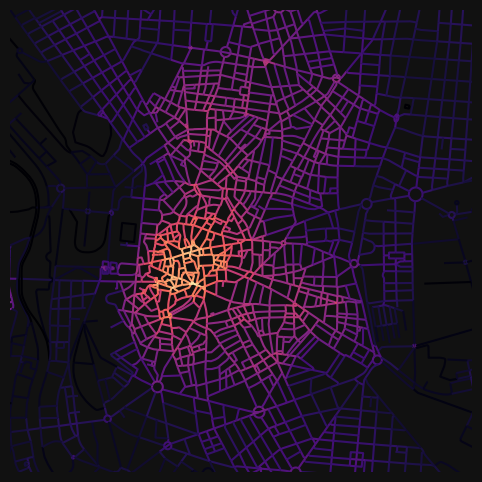

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#111")
nodes_gdf.plot(
    column="cc_harmonic_500",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.set_xlim(438500, 438500 + 3500)
ax.set_ylim(4472500, 4472500 + 3500)
ax.axis(False)

(np.float64(438500.0),
 np.float64(442000.0),
 np.float64(4472500.0),
 np.float64(4476000.0))

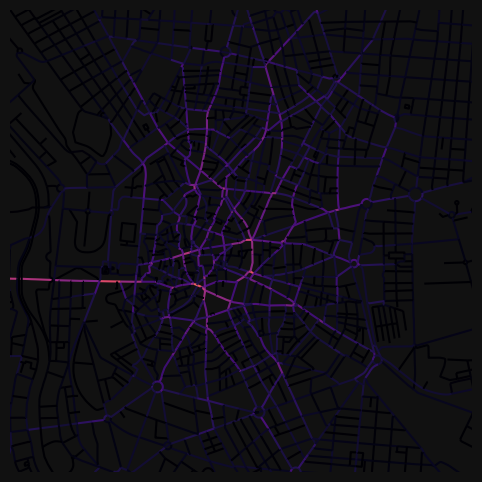

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#111")
nodes_gdf.plot(
    column="cc_betweenness_2000",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.set_xlim(438500, 438500 + 3500)
ax.set_ylim(4472500, 4472500 + 3500)
ax.axis(False)

Alternatively, you can define the distance thresholds using a list of `minutes` instead.


In [12]:
nodes_gdf = networks.node_centrality_shortest(
    network_structure=network_structure,
    nodes_gdf=nodes_gdf,
    minutes=[15],
)

INFO:cityseer.metrics.networks:Computing shortest path node centrality.
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 1200m, Beta: 0.00333, Walking Time: 15.0 minutes.


The function will map the minutes values into the equivalent distances, which are reported in the logged output. Use the configurable `speed_m_s` parameter to set a custom metres per second walking speed.


In [13]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_beta_500', 'cc_beta_2000', 'cc_cycles_500',
       'cc_cycles_2000', 'cc_density_500', 'cc_density_2000', 'cc_farness_500',
       'cc_farness_2000', 'cc_harmonic_500', 'cc_harmonic_2000',
       'cc_hillier_500', 'cc_hillier_2000', 'cc_betweenness_500',
       'cc_betweenness_2000', 'cc_betweenness_beta_500',
       'cc_betweenness_beta_2000', 'cc_beta_1200', 'cc_cycles_1200',
       'cc_density_1200', 'cc_farness_1200', 'cc_harmonic_1200',
       'cc_hillier_1200', 'cc_betweenness_1200', 'cc_betweenness_beta_1200'],
      dtype='object')

As per the function logging outputs, 15 minutes has been mapped to 1200m at default `speed_m_s`, so the corresponding outputs can be visualised using the 1200m columns.


(np.float64(438500.0),
 np.float64(442000.0),
 np.float64(4472500.0),
 np.float64(4476000.0))

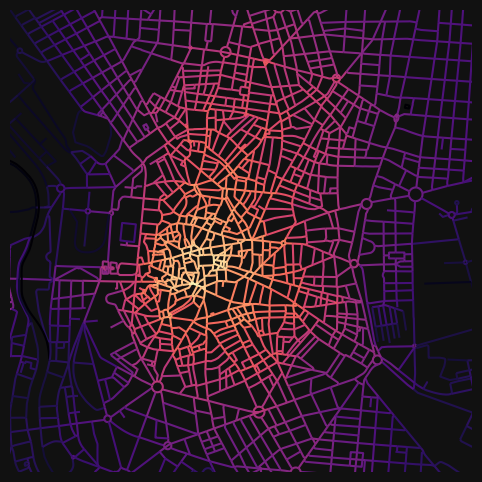

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#111")
nodes_gdf.plot(
    column="cc_harmonic_1200",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.set_xlim(438500, 438500 + 3500)
ax.set_ylim(4472500, 4472500 + 3500)
ax.axis(False)

For spatial-impedance weighted forms of centralities (beta variants), you can specify the `beta` parameter explicitly. These will otherwise be extrapolated automatically from the `distances` or `minutes` parameters. See the documentation for more information on how spatial impedances are converted to distance thresholds.


In [18]:
nodes_gdf = networks.node_centrality_shortest(
    network_structure=network_structure,
    nodes_gdf=nodes_gdf,
    betas=[0.01],
)

INFO:cityseer.metrics.networks:Computing shortest path node centrality.
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 400m, Beta: 0.01, Walking Time: 5.0 minutes.


In [19]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_beta_500', 'cc_beta_2000', 'cc_cycles_500',
       'cc_cycles_2000', 'cc_density_500', 'cc_density_2000', 'cc_farness_500',
       'cc_farness_2000', 'cc_harmonic_500', 'cc_harmonic_2000',
       'cc_hillier_500', 'cc_hillier_2000', 'cc_betweenness_500',
       'cc_betweenness_2000', 'cc_betweenness_beta_500',
       'cc_betweenness_beta_2000', 'cc_beta_1200', 'cc_cycles_1200',
       'cc_density_1200', 'cc_farness_1200', 'cc_harmonic_1200',
       'cc_hillier_1200', 'cc_betweenness_1200', 'cc_betweenness_beta_1200',
       'cc_beta_400', 'cc_cycles_400', 'cc_density_400', 'cc_farness_400',
       'cc_harmonic_400', 'cc_hillier_400', 'cc_betweenness_400',
       'cc_betweenness_beta_400'],
      dtype='object')

(np.float64(438500.0),
 np.float64(442000.0),
 np.float64(4472500.0),
 np.float64(4476000.0))

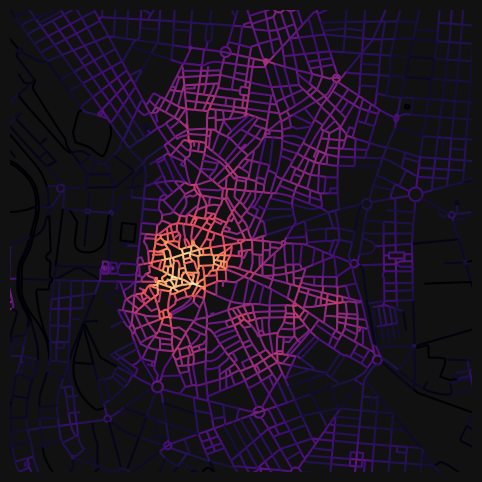

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#111")
nodes_gdf.plot(
    column="cc_beta_400",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.set_xlim(438500, 438500 + 3500)
ax.set_ylim(4472500, 4472500 + 3500)
ax.axis(False)